# Introduccion al Aprendizaje Reforzado
## 1. Introducción
En el aprendizaje reforzado los agentes aprenden a tomar decisiones a través de la interacción con un entorno dinámico, recibiendo recompensas o penalizaciones. El objetivo clave es la maximización de una señal de recompensa acumulada a largo plazo. Busca guiar el comportamiento del agente hacia decisiones óptimas basadas en la retroalimentación recibida del entorno.<br>
En esta notebook, se pesentan ejemplos de funcionamiento de aprendizaje reforzado.

## 2. Ejemplos
### 2.1. Raton y Queso
Imaginarse que un ratón está en una celda de un laberinto de 3x3. El ratón debe llegar al queso que se encuentra en la celda inferior derecha (coordenada: posicion_raton=(x,y) a ingresar). El ratón puede moverse arriba, abajo, izquierda o derecha, y gana una recompensa cuando llega al queso. En este programa, se entrenará al ratón para llegar al queso.

#### Inicio y preparación

In [1]:
import numpy as np
import random

# Parámetros del entorno
filas = 3
columnas = 3
acciones = 4  # Arriba, Abajo, Izquierda, Derecha

#### Funciones

In [5]:
# Definir las recompensas
def definir_recompensas(posicion_queso):
    # Inicializar la matriz de recompensas
    recompensas = np.full((filas, columnas), -0.1)  # Pequeña penalización por cada movimiento
    recompensas[posicion_queso] = 1  # Recompensa de 1 en la posición del queso
    return recompensas

# Función para tomar una acción
def tomar_accion(estado, accion):
    fila, columna = estado

    if accion == 0:  # Arriba
        nueva_fila = max(fila - 1, 0)  # Evitar salir del tablero
        nueva_columna = columna
    elif accion == 1:  # Abajo
        nueva_fila = min(fila + 1, filas - 1)
        nueva_columna = columna
    elif accion == 2:  # Izquierda
        nueva_fila = fila
        nueva_columna = max(columna - 1, 0)
    elif accion == 3:  # Derecha
        nueva_fila = fila
        nueva_columna = min(columna + 1, columnas - 1)

    return (nueva_fila, nueva_columna)

# Mostrar la acción en formato legible
def mostrar_accion(accion):
    if accion == 0:
        return "Arriba"
    elif accion == 1:
        return "Abajo"
    elif accion == 2:
        return "Izquierda"
    else:
        return "Derecha"

# Función para ejecutar un episodio
def ejecutar_episodio(estado_inicial):
    estado = estado_inicial
    pasos = 0
    recorrido = []
    
    while estado != posicion_queso:
        accion = np.argmax(q_table[estado])
        nuevo_estado = tomar_accion(estado, accion)
        recompensa = recompensas[nuevo_estado]
        recorrido.append((estado, accion, nuevo_estado, recompensa))
        estado = nuevo_estado
        pasos += 1
        if pasos > 50:  # Evitar bucles infinitos en caso de errores
            break

    return recorrido, pasos

#### Programa principal

In [6]:
# Inicializar la tabla Q
q_table = np.zeros((filas, columnas, acciones))

# Parámetros del algoritmo Q-Learning
alpha = 0.1  # Tasa de aprendizaje
gamma = 0.8  # Factor de descuento
epsilon = 0.1  # Tasa de exploración
episodios = 100

# Posición del queso (ajustable por parámetro)
posicion_queso = (1, 2)
recompensas = definir_recompensas(posicion_queso)

# Entrenamiento del ratón
for episodio in range(episodios):
    estado = (random.randint(0, filas - 1), random.randint(0, columnas - 1))  # Estado inicial aleatorio
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            accion = random.randint(0, 3)  # Exploración
        else:
            accion = np.argmax(q_table[estado])  # Explotación

        nuevo_estado = tomar_accion(estado, accion)
        recompensa = recompensas[nuevo_estado]

        # Actualizar la tabla Q
        q_anterior = q_table[estado][accion]
        q_max_nuevo_estado = np.max(q_table[nuevo_estado])
        q_table[estado][accion] = q_anterior + alpha * (recompensa + gamma * q_max_nuevo_estado - q_anterior)

        # Moverse al nuevo estado
        estado = nuevo_estado

        # Si llegamos al queso, terminar el episodio
        if estado == posicion_queso:
            done = True

    # Mostrar progreso para episodios seleccionados
    if episodio in [0, 4, 9, 24, 49]:
        print(f"\nEpisodio {episodio + 1}: El ratón empieza en el estado (0, 0)")
        recorrido, pasos = ejecutar_episodio(estado_inicial=(0, 0))  # Comenzar siempre desde (0, 0)
        for i, (estado, accion, nuevo_estado, recompensa) in enumerate(recorrido):
            print(f"El ratón se mueve {mostrar_accion(accion)} hacia {nuevo_estado}. Recompensa {recompensa:.1f}.")
        print(f"El ratón ha encontrado el queso en el estado {posicion_queso}. ¡Recompensa +1!")
        print(f"Episodio {episodio + 1} terminado en {pasos} pasos.")

# Probar la ruta aprendida
print("\n--- Probando la ruta aprendida ---")
estado = (0, 0)
pasos_totales = 0

while estado != posicion_queso:
    accion = np.argmax(q_table[estado])
    nuevo_estado = tomar_accion(estado, accion)
    recompensa = recompensas[nuevo_estado]
    print(f"Estado: {estado}, Acción: {mostrar_accion(accion)}, Nueva posición: {nuevo_estado}. Recompensa {recompensa:.1f}.")
    estado = nuevo_estado
    pasos_totales += 1

print(f"¡El ratón llegó al queso en {posicion_queso} en {pasos_totales} pasos!")
print("")
print("q_table:")
print(q_table)


Episodio 1: El ratón empieza en el estado (0, 0)
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El ratón se mueve Izquierda hacia (0, 0). Recompensa -0.1.
El rat

##### Resumen de la tabla Q:
La tabla tiene 4 columnas: puntuación para "arriba", "abajo", "izquierda" y "derecha". La tabla tiene 3x3=9 filas: una por cada celda.
Valores Q positivos: Indican que moverse en esa dirección desde esa casilla probablemente lleva a una mejor posición o más cerca del queso.
Valores Q cercanos a 0 o negativos: Indican que moverse en esa dirección desde esa casilla es inútil, ya sea porque lleva fuera del tablero o porque no conduce hacia el queso.
A medida que el ratón explora el tablero, la tabla Q se va llenando con valores que le indican cuáles acciones son mejores en cada estado. El objetivo es que, al final del entrenamiento, el ratón aprenda una estrategia (o política) que lo lleve al queso de la manera más eficiente posible en futuros intentos..

### 2.2. Otro ejemplo:
En este ejemplo, tenemos un entorno en el que el agente empieza en el estado inicial s_i, y debe elegir entre moverse a la izquierda o a la derecha. Si llega al estado de más a la izquierda, el episodio termina y el agente recibe una recompensa de -5. Por otro lado, si llega al estado de más a la derecha, el episodio termina y el agente recibe una recompensa de +5. El agente debe aprender a evitar el estado de -5 y moverse hacia el estado de +5. Si la política que aprende siempre termina en el estado con mayor recompensa, diremos que ha encontrado la política óptima (optimal policy). El código presente se basa en la notebook presentada en: <a href="https://colab.research.google.com/drive/1HEsflnXgZlUk30wzStJyvHZNz4JLWkRS#sandboxMode=true&scrollTo=Re3GRo2XWxa5">notebook en google collab</a>.

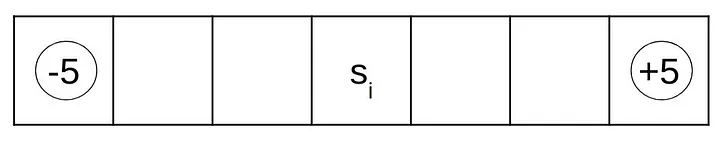

In [7]:
import numpy as np

#### Estado inicial

In [8]:
state_rewards = [-5, 0, 0, 0, 0, 0, 5]
final_state = [True, False, False, False, False, False, True]
Q_values = [[0.0, 0.0], 
            [0.0, 0.0],
            [0.0, 0.0],
            [0.0, 0.0],
            [0.0, 0.0],
            [0.0, 0.0],
            [0.0, 0.0]] # Q(s, a) matrix. [left, right].

#### Funciones

In [9]:
def select_epsilon_greedy_action(epsilon, state):
    """Take random action with probability epsilon, else take best action."""
    result = np.random.uniform()
    if result < epsilon:
        return np.random.randint(0, 2) # Random action (left or right).
    else:
        return np.argmax(Q_values[state]) # Greedy action for state.

In [10]:
def apply_action(state, action):
    """Applies the selected action and get reward and next state.
    Action 0 means move to the left and action 1 means move to the right.
    """
    if action == 0:  # Mover a la izquierda
        next_state = state - 1
    else:  # Mover a la derecha
        next_state = state + 1
    
    # Devuelve la recompensa y el siguiente estado
    reward = state_rewards[next_state]
    return reward, next_state

#### Programa Principal

In [11]:
num_episodes = 1000
epsilon = 0.2
discount = 0.9 # Change to 1.0 if you want to simplify Q-value results.

for episode in range(num_episodes+1):
    initial_state = 3 # State in the middle.
    state = initial_state
    while not final_state[state]: # Run until the end of the episode.
        # Select action.
        action = select_epsilon_greedy_action(epsilon, state)
        reward, next_state = apply_action(state, action)
        # Improve Q-values with Bellman Equation.
        if final_state[next_state]:
            Q_values[state][action] = reward
        else:
            Q_values[state][action] = reward + discount * max(Q_values[next_state])
        state = next_state

#### Presentación de resultados:

In [12]:
# Print Q-values to see if action right is always better than action left
# except for states 0 and 6, which are terminal states and you cannot take
# any action from them, so it does not matter.
print('Final Q-values are:')
print(Q_values)
action_dict = {0:'left', 1:'right'}
state = 0
for state, Q_vals in enumerate(Q_values):
    print('Best action for state {} is {}'.format(state, action_dict[np.argmax(Q_vals)]))

Final Q-values are:
[[0.0, 0.0], [-5, 3.2805], [2.9524500000000002, 3.645], [3.2805, 4.05], [3.645, 4.5], [4.05, 5], [0.0, 0.0]]
Best action for state 0 is left
Best action for state 1 is right
Best action for state 2 is right
Best action for state 3 is right
Best action for state 4 is right
Best action for state 5 is right
Best action for state 6 is left


#### Explicación del resultado:
Interpretación de las Mejores Acciones:
<br>* Estado 0: La mejor acción es "izquierda". Sin embargo, este estado es terminal, así que no tiene sentido realizar una acción desde aquí.
<br>* Estado 1: La mejor acción es "derecha", con un valor Q de 3.2805. Esto indica que moverse a la derecha es preferible, ya que se espera que lleve a una mayor recompensa.
<br>* Estado 2: También la mejor acción es "derecha", con un valor Q de 3.645. Similarmente, indica que avanzar a la derecha es ventajoso.
<br>* Estado 3 y 4: La tendencia de la mejor acción continúa siendo "derecha", lo que sugiere que seguir hacia la derecha es el camino óptimo en estos estados.
<br>* Estado 5: La mejor acción sigue siendo "derecha" (valor Q = 5), lo que significa que es el estado más favorable en el que se puede estar.
<br>* Estado 6: La mejor acción es "izquierda". Al ser un estado terminal, no hay ninguna acción que pueda resultar en un cambio.